<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P5_01_notebookExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5

[Errno 2] No such file or directory: 'drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5'
/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5


Importation des librairies nécessaires au projet

In [179]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Importation des données avec requète SQL sur le serveur de StackOverflow

In [ ]:
#SELECT * FROM posts 
#WHERE (id < 50000 AND (Tags IS NOT NULL))

In [ ]:
df_posts = pad.read_csv('QueryResults.csv')

In [ ]:
df_posts.head(10)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,756,63611,<p>I want to use a <code>Track-Bar</code> to c...,8.0,...,2021-02-26 03:31:15,2021-11-15 21:15:29,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...,12,4,59.0,NaN,2012-10-31 16:42:47,CC BY-SA 4.0
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,313,22490,<p>I have an absolutely positioned <code>div</...,9.0,...,2021-01-29 18:46:45,2021-01-29 18:46:45,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>,7,0,13.0,NaN,NaN,CC BY-SA 4.0
2,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,2100,727355,<p>Given a <code>DateTime</code> representing ...,1.0,...,2021-01-05 17:33:32,2022-02-19 14:25:44,How do I calculate someone's age based on a Da...,<c#><.net><datetime>,70,10,484.0,NaN,2011-08-16 19:40:43,CC BY-SA 4.0
3,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1610,188194,<p>Given a specific <code>DateTime</code> valu...,1.0,...,2017-06-04 15:51:19,2022-03-11 20:03:19,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,41,3,552.0,NaN,2009-09-04 13:15:59,CC BY-SA 3.0
4,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,672,246671,<p>Is there a standard way for a web server to...,9.0,...,2020-12-03 03:37:56,2021-12-27 13:34:18,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,27,10,157.0,NaN,NaN,CC BY-SA 4.0
5,14,1,NaN,NaN,2008-08-01 00:59:11,NaN,471,161542,"<p>What is the difference between <a href=""htt...",11.0,...,2017-02-25 17:42:17,2021-04-22 05:49:24,Difference between Math.Floor() and Math.Trunc...,<.net><math>,13,1,66.0,NaN,NaN,CC BY-SA 3.0
6,16,1,12446.0,NaN,2008-08-01 04:59:33,NaN,149,86506,<p>How do you expose a LINQ query as an ASMX w...,2.0,...,2021-01-07 14:09:26,2021-01-07 14:09:26,Filling a DataSet or a DataTable from a LINQ q...,<c#><linq><web-services><.net-3.5>,7,0,15.0,NaN,NaN,CC BY-SA 4.0
7,17,1,26.0,NaN,2008-08-01 05:09:55,NaN,194,83437,"<p>How do I store binary data in <a href=""http...",2.0,...,2020-12-03 03:37:51,2020-12-03 03:37:51,Binary Data in MySQL,<mysql><database><binary-data><data-storage>,9,3,23.0,2018-11-29 15:36:04,NaN,CC BY-SA 3.0
8,19,1,531.0,NaN,2008-08-01 05:21:22,NaN,340,63486,<p>I'm looking for the fastest way to obtain t...,13.0,...,2019-05-15 01:33:48,2021-11-24 18:36:40,What is the fastest way to get the value of π?,<performance><algorithm><language-agnostic><un...,23,17,85.0,NaN,NaN,CC BY-SA 4.0
9,24,1,49.0,NaN,2008-08-01 12:12:19,NaN,189,95256,<p>If I have a trigger before the update on a ...,22.0,...,2021-01-29 12:57:17,2021-01-29 12:57:17,Throw an error preventing a table update in a ...,<mysql><database><triggers>,7,0,27.0,NaN,NaN,CC BY-SA 4.0


In [ ]:
df_posts.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense'],
      dtype='object')

In [ ]:
df_posts = df_posts[['Body', 'Tags', 'Title']]

Exploration des données

In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette) 

In [ ]:
df_posts['Title'][0]

'How to convert a Decimal to a Double in C#?'

In [ ]:
nltk.word_tokenize(df_posts['Title'][0])

['How',
 'to',
 'convert',
 'a',
 'Decimal',
 'to',
 'a',
 'Double',
 'in',
 'C',
 '#',
 '?']

Discrimination des mots avec '

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize(df_posts['Title'][0])

['How', 'to', 'convert', 'a', 'Decimal', 'to', 'a', 'Double', 'in', 'C']

N'est pas intéressant pour la problématique car enlève les infos type "#"

In [ ]:
freq_word = (df_posts.Title.str.split(expand=True).stack().value_counts()/len(df_posts.Title.str.split(expand=True).stack().value_counts())*100).head(10)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Words')]

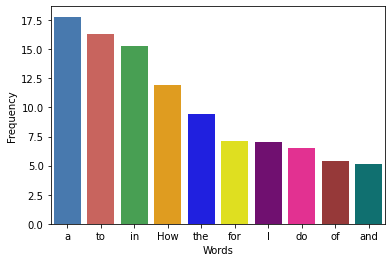

In [ ]:
ax = sns.barplot(x=freq_word.index, y=freq_word, palette = custom_palette)
ax.set(xlabel = "Words", ylabel = "Frequency")

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
def stopWordFucntion(sentence) :
  word_tokens = word_tokenize(sentence)
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  return ', '.join(filtered_sentence)

In [ ]:
df_posts["Title_StopWordLess"] = df_posts["Title"].apply(stopWordFucntion)

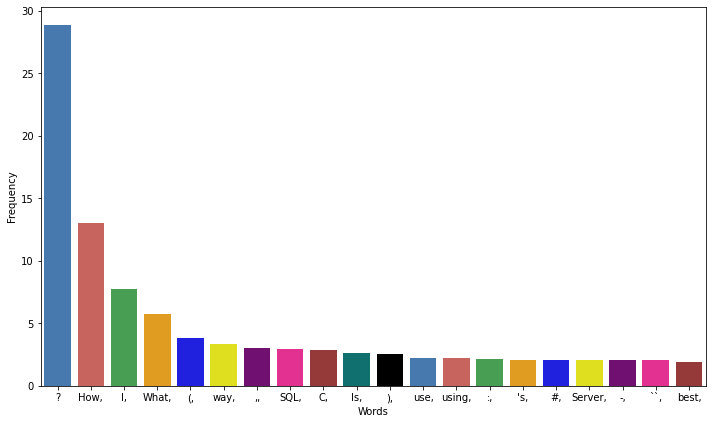

In [ ]:
freq_word = (df_posts.Title_StopWordLess.str.split(expand=True).stack().value_counts()/len(df_posts.Title_StopWordLess.str.split(expand=True).stack().value_counts())*100).head(20)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=freq_word.index, y=freq_word, palette = custom_palette)
ax.set(xlabel = "Words", ylabel = "Frequency")
plt.tight_layout()

Il y a encore beaucoup de "mots" qui n'ont pas d'intérêt dans notre problématique, je mets à jours la liste des stopwords pour les supprimers de notre dababase

In [178]:
new_stopwords = ["?", "How", "What", "way" "I", "(", ")", ",,", "Is", ":", "'s", ":", "``", "-", "best", "Best"]
stop_words.extend(new_stopwords)

In [176]:
df_posts["Title_StopWordLess"] = df_posts["Title"].apply(stopWordFucntion)

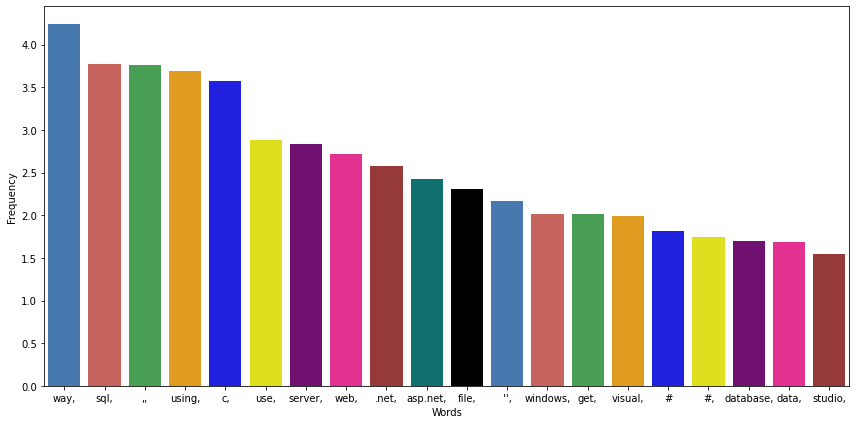

In [185]:
freq_word = (df_posts.Title_StopWordLess.str.split(expand=True).stack().value_counts()/len(df_posts.Title_StopWordLess.str.split(expand=True).stack().value_counts())*100).head(20)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=freq_word.index, y=freq_word, palette = custom_palette)
ax.set(xlabel = "Words", ylabel = "Frequency")
plt.tight_layout()

J'applique ensuite une lemmatisation pour représenter les mots sous leur forme canonique

In [182]:
porter = PorterStemmer()
df_posts["Title_StopWordLess"] = df_posts["Title_StopWordLess"].apply(porter.stem)

Sauvegarde de la database pour modélisation

In [ ]:
df_final.to_csv('data_projet5_clean.csv', sep='\t', index=True)